In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# The positional encoding from the transformer paper
def positional_encoding(seq_length, d_model):

    pos = np.arange(seq_length).reshape((-1,1))  # Shape (seq_length, 1)
    i = np.arange(d_model).reshape((1,-1))  # Shape (1, d_model)

    # Compute angles using the formula from the Transformer paper
    div_term = 1/10000**(2*(i/2)/d_model)

    # Apply sine to even indices, cosine to odd indices
    pe = np.zeros((seq_length, d_model))
    pe[:, 0::2] = np.sin(pos * div_term[:, 0::2])  # Even indices (sin)
    pe[:, 1::2] = np.cos(pos * div_term[:, 1::2])  # Odd indices (cos)

    # This is the one we'd use for the diffusion model
    # pe_sin = np.sin(pos * div_term[:, 0::2])
    # pe_cos = np.cos(pos * div_term[:, 1::2])
    # pe = np.concatenate((pe_sin, pe_cos), axis=1)

    return pe

In [ ]:
# Define sequence length and embedding dimension
seq_length = 100
d_model = 512

# Compute positional encodings
pe = positional_encoding(seq_length, d_model)

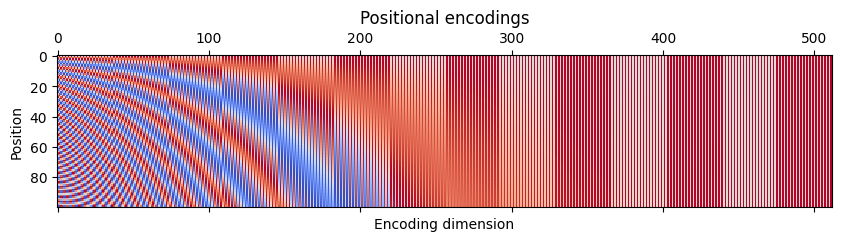

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(pe, cmap='coolwarm')
plt.xlabel('Encoding dimension')
plt.ylabel('Position')
plt.title('Positional encodings')
plt.show()

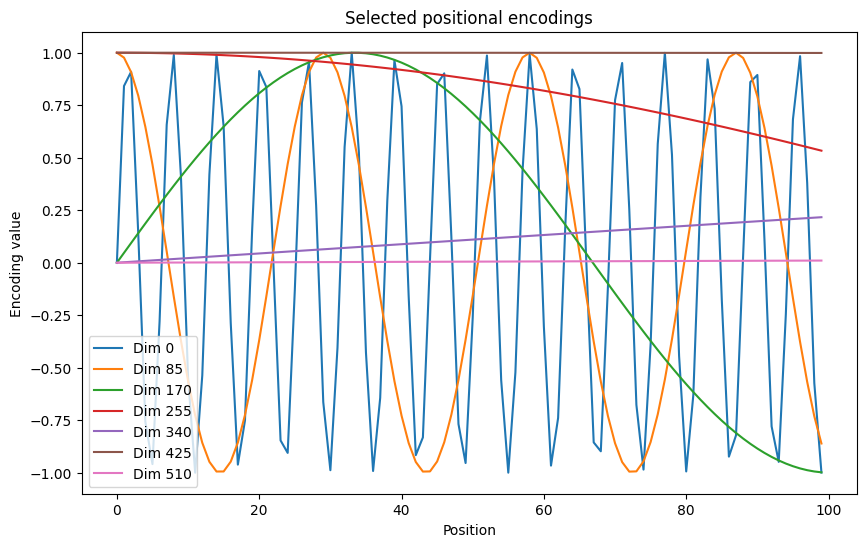

In [ ]:
# Plot the positional encodings for some of the embedding dimensions
plt.figure(figsize=(10, 6))
for i in range(0,d_model, d_model//6):
    plt.plot(pe[:, i], label=f'Dim {i}')
plt.xlabel('Position')
plt.ylabel('Encoding value')
plt.title('Selected positional encodings')
plt.legend()
plt.show()

In [ ]:
print(f'Shape of positional encoding: {pe.shape}')

Shape of positional encoding: (100, 512)


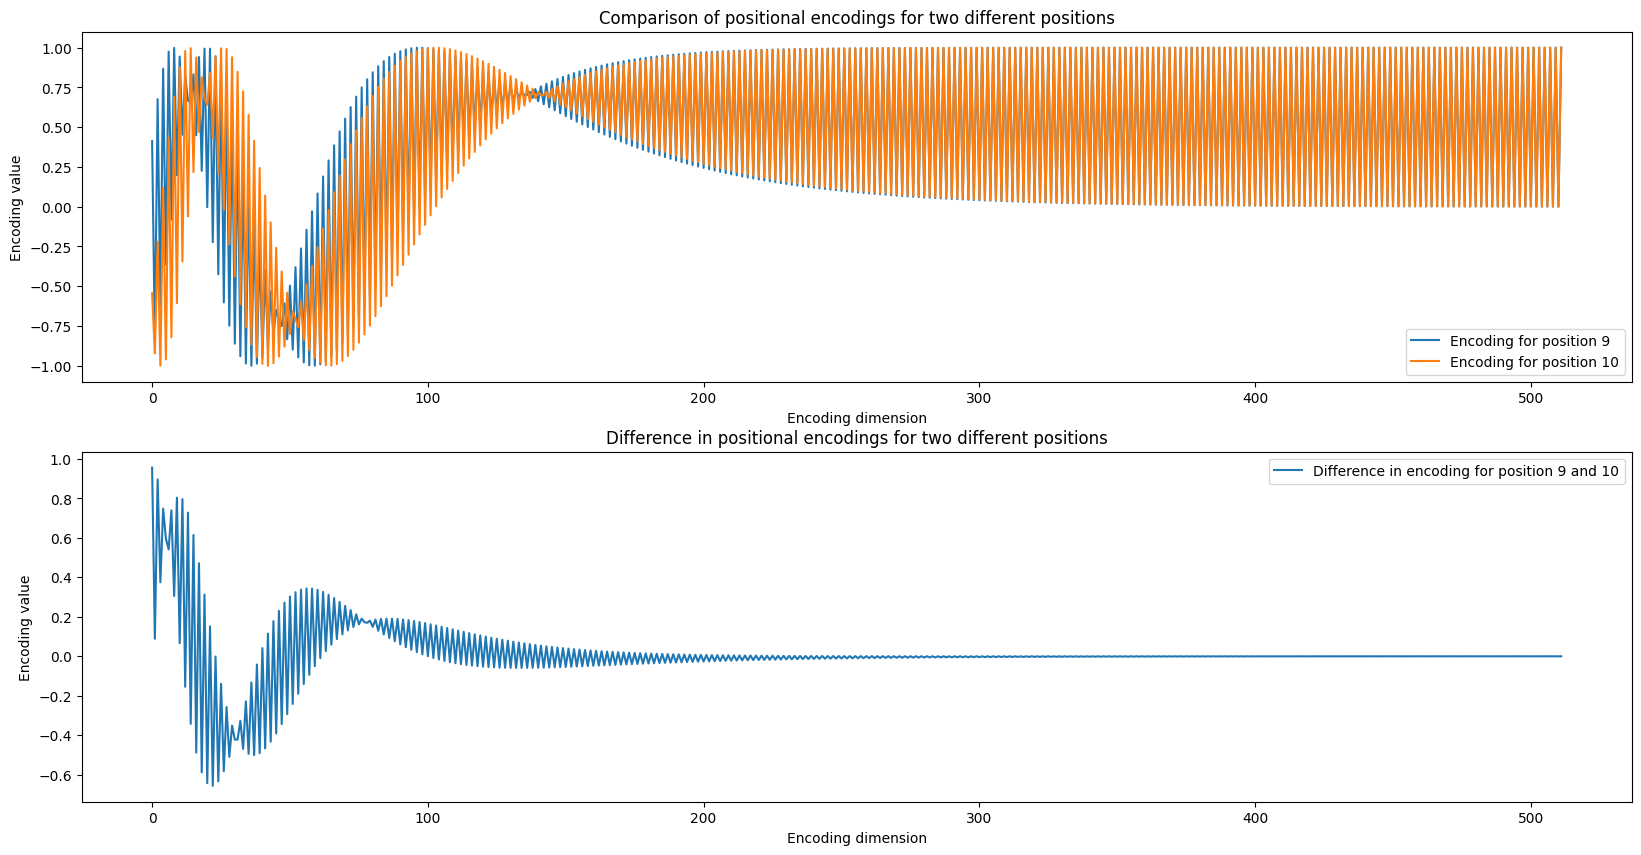

In [ ]:
# Compare two positions
pos_1, pos_2 = 9, 10

plt.figure(figsize=(20, 10))
plt.subplot(211)
plt.plot(pe[pos_1, :], label=f'Encoding for position {pos_1}')
plt.plot(pe[pos_2, :], label=f'Encoding for position {pos_2}')
plt.xlabel('Encoding dimension')
plt.ylabel('Encoding value')
plt.title('Comparison of positional encodings for two different positions')
plt.legend()

plt.subplot(212)
plt.plot(pe[pos_1, :]-pe[pos_2, :], label=f'Difference in encoding for position {pos_1} and {pos_2}')
plt.xlabel('Encoding dimension')
plt.ylabel('Encoding value')
plt.title('Difference in positional encodings for two different positions')
plt.legend()


plt.show()